# Simulating a Real-World Phenomenon - Irish Discrimination Rates

The real-world phenomenon I choose to review was the relationship between cis-male / cis-female genders and the discrimination rates in Ireland. This simulated dataset will be based on data derived from the Central Statistics Office QNHS Equality report recorded in quarter three of 2014. [1]

Per this report, 12% of people recorded to have felt discriminated against over the previous two years. As the number of males and females who took in the study is not explicitly detailed, a 50% rate of participation for each gender will be assumed. Table 2.4, [1], details that 630 males and 1,069 females reported discrimination. These figures will be used as the basis of generated the dataset.  


## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline


## Calculate Total Survey Size

In [22]:
# 2014 Ratio: https://www.cso.ie/en/releasesandpublications/er/q-eq/qnhsequalitymodulequarter32014/

total_disc_yes = 0.12

# Of 12% Yes
M = 630
F = 1069
T = M + F

# Estimate Total Survey Size
T = int(round(T / 0.12))
print("Estimated Total Survey Size: ", T)

# Assume 50% M/F
hlf_T = T /2

M_R = (M/hlf_T)*100
F_R = (F/hlf_T)*100

print("Percentage of Males who felt discriminated against: ", M_R)
print("Percentage of Females who felt discriminated against: ",F_R)

Estimated Total Survey Size:  14158
Percentage of Males who felt discriminated against:  8.899562085040259
Percentage of Females who felt discriminated against:  15.101002966520696


## Sex

In [23]:
# Set Array
sex_x = ['Male', 'Female']


# Build Dataframe - Assume 50% Males and Females
sex = np.random.choice(sex_x, T, p=[0.5, 0.5])

df=pd.DataFrame(data={'Sex': sex})


print(df)

          Sex
0      Female
1        Male
2        Male
3        Male
4        Male
5        Male
6      Female
7        Male
8      Female
9        Male
10       Male
11       Male
12     Female
13       Male
14     Female
15       Male
16     Female
17     Female
18     Female
19       Male
20     Female
21     Female
22     Female
23     Female
24       Male
25       Male
26     Female
27     Female
28     Female
29       Male
...       ...
14128  Female
14129  Female
14130    Male
14131    Male
14132  Female
14133    Male
14134  Female
14135  Female
14136  Female
14137    Male
14138  Female
14139    Male
14140  Female
14141    Male
14142    Male
14143  Female
14144  Female
14145  Female
14146  Female
14147    Male
14148  Female
14149  Female
14150    Male
14151  Female
14152  Female
14153  Female
14154  Female
14155    Male
14156  Female
14157  Female

[14158 rows x 1 columns]


## Experienced Discrimination

In [35]:
# Set Array
disc_xm = ['M_Y', 'M_N']
disc_xf = ['F_Y', 'F_N']

M_Y = M
F_Y = F

# Assume 50% Males and 50% Females

M_N = hlf_T - M_Y
F_N = hlf_T - F_Y

M_T = M_Y + M_N
F_T = F_Y + F_N

M_Y = M_Y/M_T
M_N = M_N/M_T
F_Y = F_Y/F_T
F_N = F_N/F_T

print("% Males Yes: ", round(M_Y*100,2))
print("% Males No: ", round(M_N*100,2))
print()
print("% Females Yes: ", round(F_Y*100,2))
print("% Females No: ", round(F_N*100,2))
print()

# Male
disc_yes_m =  df['Sex']=='Male'
df_m = df[disc_yes_m]

# Female
disc_yes_f =  df['Sex']=='Female'
df_f = df[disc_yes_f]


# Male
yes_count_xm = df_m['Sex']
yes_count_m = yes_count_xm.count()

# Female
yes_count_xf = df_f['Sex']
yes_count_f = yes_count_xf.count()

# Build Dataframe
disc_m = np.random.choice(disc_xm, yes_count_m, p=[M_Y, M_N])
disc_f = np.random.choice(disc_xf, yes_count_f, p=[F_Y, F_N])


# Set Type Column
df_m['Discriminated Against'] = disc_m
df_f['Discriminated Against'] = disc_f


# Join Dataframes
frames_a = [df_m, df_f]

df = pd.concat(frames_a)

# Sort by index
df.sort_index(inplace=True)


df ['Discriminated Against'].replace({'M_Y':'Yes', 'M_N':'No', 'F_Y':'Yes', 'F_N':'No'}, inplace=True)


print(df)

% Males Yes:  8.9
% Males No:  91.1

% Females Yes:  15.1
% Females No:  84.9

          Sex Discriminated Against
0      Female                    No
1        Male                    No
2        Male                    No
3        Male                    No
4        Male                    No
5        Male                    No
6      Female                    No
7        Male                    No
8      Female                    No
9        Male                    No
10       Male                    No
11       Male                   Yes
12     Female                   Yes
13       Male                    No
14     Female                    No
15       Male                    No
16     Female                    No
17     Female                   Yes
18     Female                   Yes
19       Male                    No
20     Female                    No
21     Female                   Yes
22     Female                    No
23     Female                    No
24       Male        

## Discrimination Type

As multiple responses were allowed for discrimination type, the results will be weighted to generate new percentages. This will ensure that the probabilities will all equal 1. It will also ensure that values with higher percentages will be correctly represented in the simulated dataset.  Subsequently, it will allow visualization of the relationship between gender and discrimination types.

In [37]:
# Set Array
discrim_type = ['Gender', 'Marital Status', 'Family Status', 'Age', 'Disability', 'Race', 'Other']

# Males

# Set Discrimination Types %
gen_m = 9
mar_m = 3
fam_m = 9
age_m = 24
dis_m = 6
rac_m = 21
oth_m = 41

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_m = gen_m + mar_m + fam_m + age_m + dis_m +  rac_m + oth_m

gen_m = gen_m/tot_disc_m
mar_m = mar_m/tot_disc_m
fam_m = fam_m/tot_disc_m
age_m = age_m/tot_disc_m
dis_m = dis_m/tot_disc_m
rac_m = rac_m/tot_disc_m
oth_m = oth_m/tot_disc_m

print("Weighted % Males - Gender: ", round(gen_m*100,2))
print("Weighted % Males - Marital Status: ", round(mar_m*100,2))
print("Weighted % Males - Family Status: ", round(fam_m*100,2))
print("Weighted % Males - Age: ", round(age_m*100,2))
print("Weighted % Males - Disability: ", round(dis_m*100,2))
print("Weighted % Males - Race: ", round(rac_m*100,2))
print("Weighted % Males - Other: ", round(oth_m*100,2))
print()
print("Weighted % Females - Gender: ", round(gen_f*100,2))
print("Weighted % Females - Marital Status: ", round(mar_f*100,2))
print("Weighted % Females - Family Status: ", round(fam_f*100,2))
print("Weighted % Females - Age: ", round(age_f*100,2))
print("Weighted % Females - Disability: ", round(dis_f*100,2))
print("Weighted % Females - Race: ", round(rac_f*100,2))
print("Weighted % Females - Other: ", round(oth_f*100,2))
print()

# Females

# Set Discrimination Types %
gen_f = 14 
mar_f = 5
fam_f = 14
age_f = 24
dis_f = 6
rac_f = 17
oth_f = 36

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_f = gen_f + mar_f + fam_f + age_f + dis_f +  rac_f + oth_f

gen_f = gen_f/tot_disc_f
mar_f = mar_f/tot_disc_f
fam_f = fam_f/tot_disc_f
age_f = age_f/tot_disc_f
dis_f = dis_f/tot_disc_f
rac_f = rac_f/tot_disc_f
oth_f = oth_f/tot_disc_f

# Split Dataframe
disc_yes =  df['Discriminated Against']=='Yes'
df_yes = df[disc_yes]

# Male
disc_yes_m =  df_yes['Sex']=='Male'
df_yes_m = df_yes[disc_yes_m]

# Female
disc_yes_f =  df_yes['Sex']=='Female'
df_yes_f = df_yes[disc_yes_f]


disc_no =  df['Discriminated Against']=='No'
df_no = df[disc_no]

# Set Count for Yes

# Male
yes_count_xm = df_yes_m['Discriminated Against']
yes_count_m = yes_count_xm.count()

# Female
yes_count_xf = df_yes_f['Discriminated Against']
yes_count_f = yes_count_xf.count()

# Populate Weighted Random Choice

# Male
type_disc_m = np.random.choice(discrim_type, yes_count_m, p=[gen_m, mar_m, fam_m, age_m, dis_m, rac_m, oth_m])

# Female
type_disc_f = np.random.choice(discrim_type, yes_count_f, p=[gen_f, mar_f, fam_f, age_f, dis_f, rac_f, oth_f])

# Set Type Column
df_no['Type'] = 'NA'
df_yes_m['Type'] = type_disc_m
df_yes_f['Type'] = type_disc_f


# Join Dataframes
frames_a = [df_yes_m, df_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)
print(df)

Weighted % Males - Gender:  7.96
Weighted % Males - Marital Status:  2.65
Weighted % Males - Family Status:  7.96
Weighted % Males - Age:  21.24
Weighted % Males - Disability:  5.31
Weighted % Males - Race:  18.58
Weighted % Males - Other:  36.28

Weighted % Females - Gender:  12.07
Weighted % Females - Marital Status:  4.31
Weighted % Females - Family Status:  12.07
Weighted % Females - Age:  20.69
Weighted % Females - Disability:  5.17
Weighted % Females - Race:  14.66
Weighted % Females - Other:  31.03

          Sex Discriminated Against            Type
0      Female                    No              NA
1        Male                    No              NA
2        Male                    No              NA
3        Male                    No              NA
4        Male                    No              NA
5        Male                    No              NA
6      Female                    No              NA
7        Male                    No              NA
8      Female       

## Social Setting

Like discrimination type, multiple responses were allowed for social setting were the discrimination occurred. The results will again be weighted to generate new percentages. This will ensure that the probabilities will all equal 1. There was no clearly indicated relationship between where the discrimination occurred and the type of discrimination. Due to this, the data will be populated randomly. The relationship assessment will occur between Sex and the other variables. 

In [6]:
# Set Array
discrim_set = ['Workplace', 'Looking for Work', 'Public Place', 'Banks', 'Education', 'Obtaining Housing', 'Accessing health services', 'Using transport services', 'Accessing public services']

# Note there is no clear connection detailed between social setting and discrimination type, therefor random

# Males

# Set Discrimination Setting %
wrk_m = 26
lrk_m = 31
pub_m = 17
ban_m = 16
edu_m = 4
hou_m = 10
hea_m = 11
tra_m = 4
ser_m = 10

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_set_m = wrk_m + lrk_m + pub_m + ban_m + edu_m + hou_m + hea_m + tra_m + ser_m

wrk_m = wrk_m/tot_disc_set_m
lrk_m = lrk_m/tot_disc_set_m
pub_m = pub_m/tot_disc_set_m
ban_m = ban_m/tot_disc_set_m
edu_m = edu_m/tot_disc_set_m
hou_m = hou_m/tot_disc_set_m
hea_m = hea_m/tot_disc_set_m
tra_m = tra_m/tot_disc_set_m
ser_m = ser_m/tot_disc_set_m

# Females

# Set Discrimination Setting %
wrk_f = 31
lrk_f = 22
pub_f = 19
ban_f = 16
edu_f = 5
hou_f = 11
hea_f = 15
tra_f = 5
ser_f = 7

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_set_f = wrk_f + lrk_f + pub_f + ban_f + edu_f + hou_f + hea_f + tra_f + ser_f

wrk_f = wrk_f/tot_disc_set_f
lrk_f = lrk_f/tot_disc_set_f
pub_f = pub_f/tot_disc_set_f
ban_f = ban_f/tot_disc_set_f
edu_f = edu_f/tot_disc_set_f
hou_f = hou_f/tot_disc_set_f
hea_f = hea_f/tot_disc_set_f
tra_f = tra_f/tot_disc_set_f
ser_f = ser_f/tot_disc_set_f

# Split Dataframe
disc_set_yes =  df['Discriminated Against']=='Yes'
df_set_yes = df[disc_set_yes]

# Male
disc_set_yes_m =  df_set_yes['Sex']=='Male'
df_set_yes_m = df_set_yes[disc_set_yes_m]

# Female
disc_set_yes_f =  df_set_yes['Sex']=='Female'
df_set_yes_f = df_set_yes[disc_set_yes_f]


disc_set_no =  df['Discriminated Against']=='No'
df_set_no = df[disc_set_no]

# Set Count for Yes

# Male
yes_set_count_xm = df_set_yes_m['Discriminated Against']
yes_set_count_m = yes_set_count_xm.count()

# Female
yes_set_count_xf = df_set_yes_f['Discriminated Against']
yes_set_count_f = yes_set_count_xf.count()

# Populate Weighted Random Choice

# Male
type_disc_set_m = np.random.choice(discrim_set, yes_set_count_m, p=[wrk_m, lrk_m ,pub_m ,ban_m ,edu_m ,hou_m, hea_m, tra_m, ser_m])

# Female
type_disc_set_f = np.random.choice(discrim_set, yes_set_count_f, p=[wrk_f, lrk_f ,pub_f ,ban_f ,edu_f ,hou_f, hea_f, tra_f, ser_f])

# Set Type Column
df_set_no['Social Setting'] = 'NA'
df_set_yes_m['Social Setting'] = type_disc_set_m
df_set_yes_f['Social Setting'] = type_disc_set_f


# Join Dataframes
frames_a = [df_set_yes_m, df_set_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_set_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)
print(df)

          Sex Discriminated Against        Type             Social Setting
0      Female                   Yes         Age  Accessing health services
1      Female                   Yes       Other               Public Place
2        Male                    No          NA                         NA
3        Male                    No          NA                         NA
4      Female                    No          NA                         NA
5        Male                    No          NA                         NA
6        Male                    No          NA                         NA
7        Male                    No          NA                         NA
8        Male                    No          NA                         NA
9        Male                    No          NA                         NA
10       Male                    No          NA                         NA
11     Female                    No          NA                         NA
12     Female            

## Action Taken

In [7]:
# Set Array
action_set = ['Verbal', 'Written', 'Offical / Legal', 'No Action']

# Note there is no clear connection detailed between Action Taken to social setting and discrimination type, therefore random

# Males

# Set Discrimination Setting %
ver_m = 23
wri_m = 7
off_m = 10
noa_m = 65

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_act_set_m = ver_m + wri_m + off_m + noa_m

ver_m = ver_m/tot_act_set_m
wri_m = wri_m/tot_act_set_m
off_m = off_m/tot_act_set_m
noa_m = noa_m/tot_act_set_m


# Females

# Set Discrimination Setting %
ver_f = 27
wri_f = 9
off_f = 9
noa_f = 63

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_act_set_f = ver_f + wri_f + off_f + noa_f

ver_f = ver_f/tot_act_set_f
wri_f = wri_f/tot_act_set_f
off_f = off_f/tot_act_set_f
noa_f = noa_f/tot_act_set_f

# Split Dataframe
disc_set_yes =  df['Discriminated Against']=='Yes'
df_set_yes = df[disc_set_yes]

# Male
disc_set_yes_m =  df_set_yes['Sex']=='Male'
df_set_yes_m = df_set_yes[disc_set_yes_m]

# Female
disc_set_yes_f =  df_set_yes['Sex']=='Female'
df_set_yes_f = df_set_yes[disc_set_yes_f]


disc_set_no =  df['Discriminated Against']=='No'
df_set_no = df[disc_set_no]

# Set Count for Yes

# Male
yes_set_count_xm = df_set_yes_m['Discriminated Against']
yes_set_count_m = yes_set_count_xm.count()

# Female
yes_set_count_xf = df_set_yes_f['Discriminated Against']
yes_set_count_f = yes_set_count_xf.count()

# Populate Weighted Random Choice

# Male
type_act_set_m = np.random.choice(action_set, yes_set_count_m, p=[ver_m, wri_m, off_m, noa_m])

# Female
type_act_set_f = np.random.choice(action_set, yes_set_count_f, p=[ver_f, wri_f, off_f, noa_f])

# Set Action Column
df_set_no['Type Action Taken'] = 'NA'
df_set_yes_m['Type Action Taken'] = type_act_set_m
df_set_yes_f['Type Action Taken'] = type_act_set_f


# Join Dataframes
frames_a = [df_set_yes_m, df_set_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_set_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)

# Add Action Y/N Column
df['Action Taken'] = df['Type Action Taken']
df ['Action Taken'].replace({'Verbal':'Yes', 'Written':'Yes', 'Offical / Legal':'Yes', 'No Action':'No'}, inplace=True)

print(df)

          Sex Discriminated Against        Type             Social Setting  \
0      Female                   Yes         Age  Accessing health services   
1      Female                   Yes       Other               Public Place   
2        Male                    No          NA                         NA   
3        Male                    No          NA                         NA   
4      Female                    No          NA                         NA   
5        Male                    No          NA                         NA   
6        Male                    No          NA                         NA   
7        Male                    No          NA                         NA   
8        Male                    No          NA                         NA   
9        Male                    No          NA                         NA   
10       Male                    No          NA                         NA   
11     Female                    No          NA                 

## Sort Columns

In [8]:
df = df[["Sex","Discriminated Against","Type","Social Setting","Action Taken","Type Action Taken"]]
print(df)

          Sex Discriminated Against        Type             Social Setting  \
0      Female                   Yes         Age  Accessing health services   
1      Female                   Yes       Other               Public Place   
2        Male                    No          NA                         NA   
3        Male                    No          NA                         NA   
4      Female                    No          NA                         NA   
5        Male                    No          NA                         NA   
6        Male                    No          NA                         NA   
7        Male                    No          NA                         NA   
8        Male                    No          NA                         NA   
9        Male                    No          NA                         NA   
10       Male                    No          NA                         NA   
11     Female                    No          NA                 

## Plot

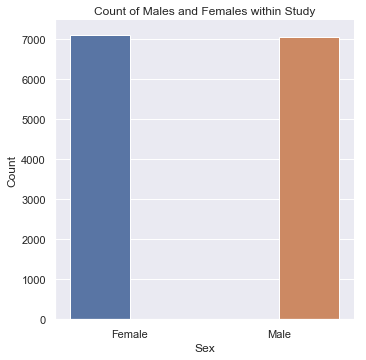

In [9]:
mf = sns.catplot(x="Sex", hue="Sex", kind="count", data=df)
mf.set(ylabel="Count")
mf.set(title="Count of Males and Females within Study")
plt.show()

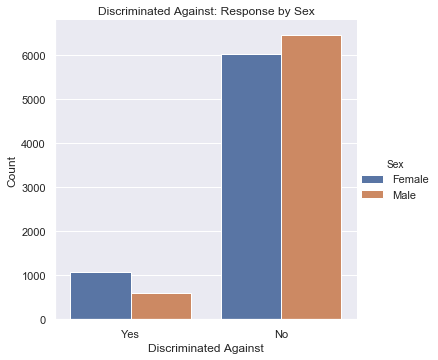

In [10]:
yn = sns.catplot(x="Discriminated Against", hue="Sex", kind="count", data=df)
yn.set(ylabel="Count")
yn.set(title="Discriminated Against: Response by Sex")
plt.show()

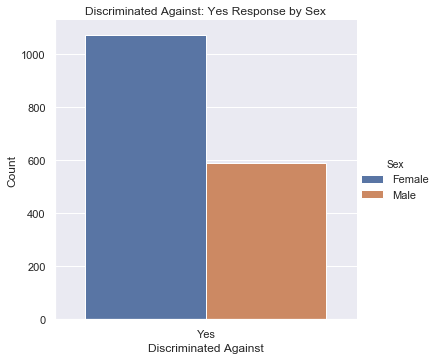

In [11]:
df_yes =  df['Discriminated Against']=='Yes'
df.yes = df[df_yes]

y = sns.catplot(x="Discriminated Against", hue="Sex", kind="count", data=df.yes)
y.set(ylabel="Count")
y.set(title="Discriminated Against: Yes Response by Sex")
plt.show()

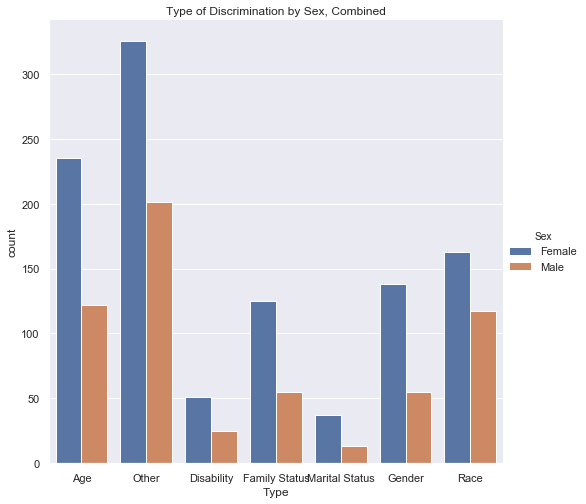

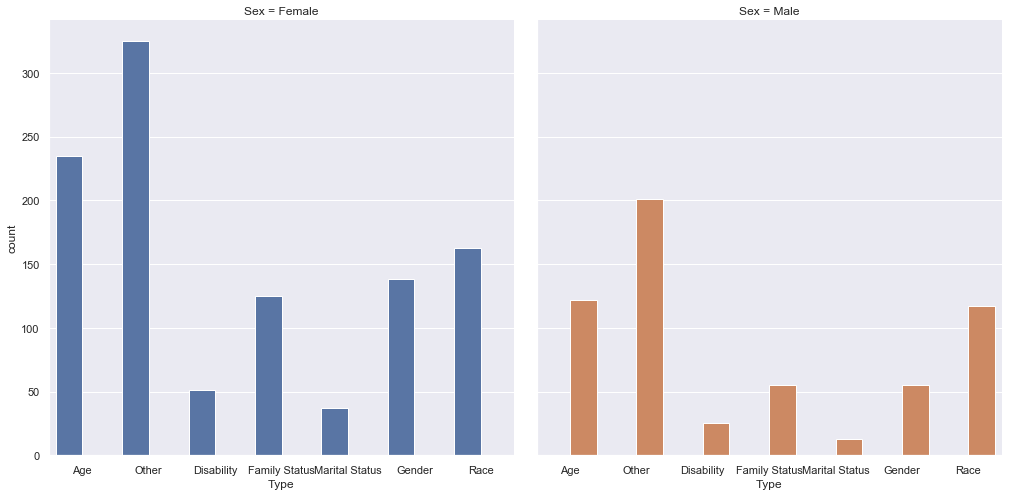

In [12]:
v = sns.catplot(x="Type", hue="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);
v.set(title="Type of Discrimination by Sex, Combined")
g = sns.catplot(x="Type", hue="Sex", col="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);

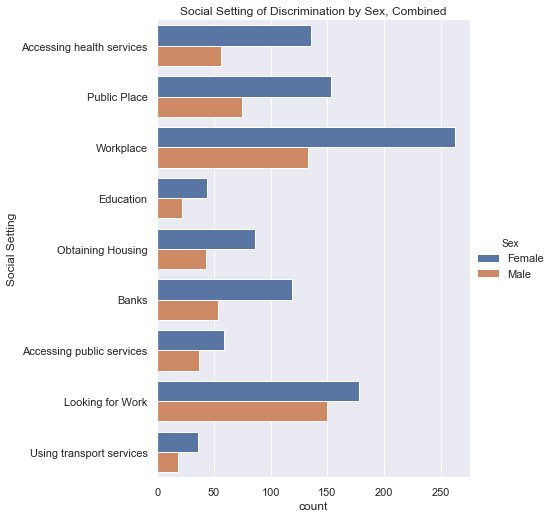

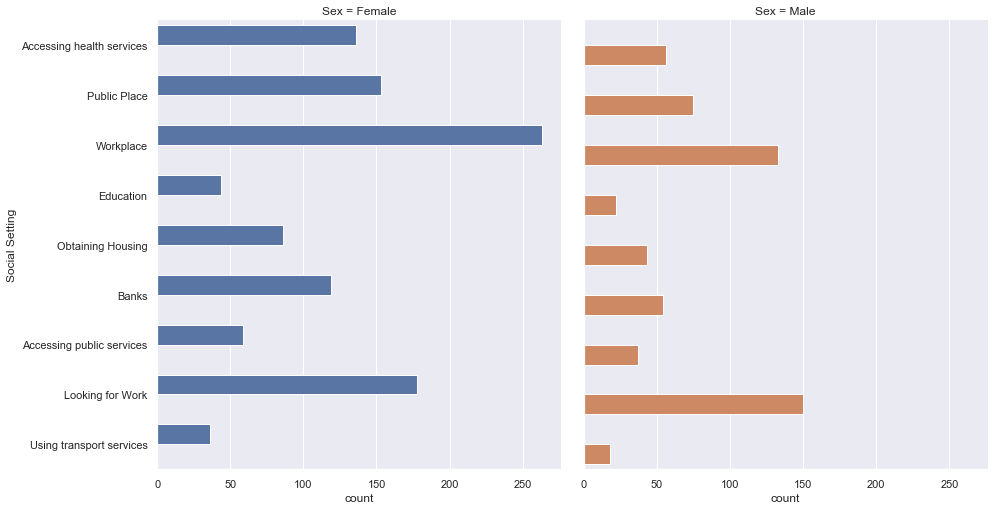

In [13]:
v = sns.catplot(y="Social Setting", hue="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);
v.set(title="Social Setting of Discrimination by Sex, Combined")
g = sns.catplot(y="Social Setting", hue="Sex", col="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);

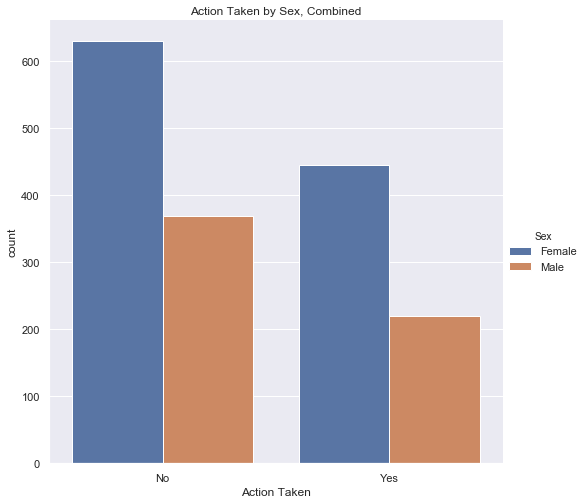

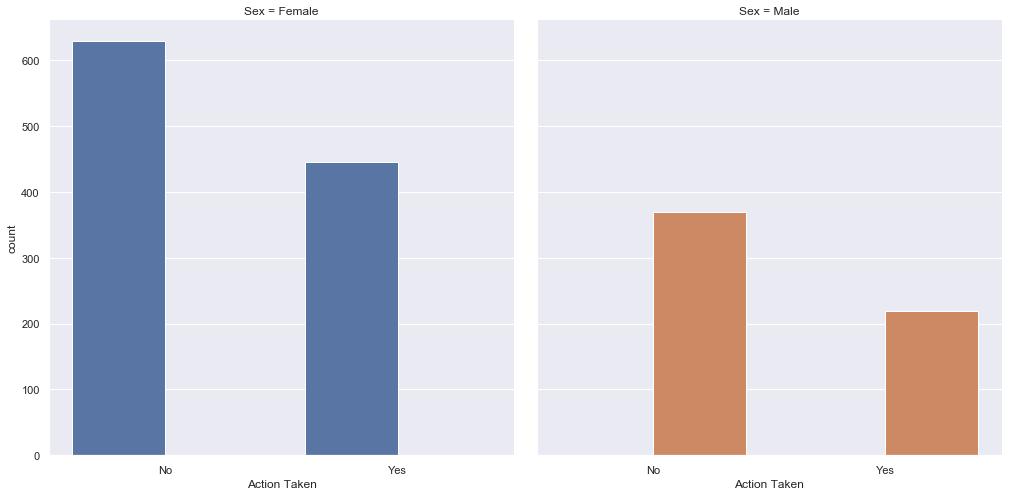

In [14]:
v = sns.catplot(x="Action Taken", hue="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);
v.set(title="Action Taken by Sex, Combined")
g = sns.catplot(x="Action Taken", hue="Sex", col="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);

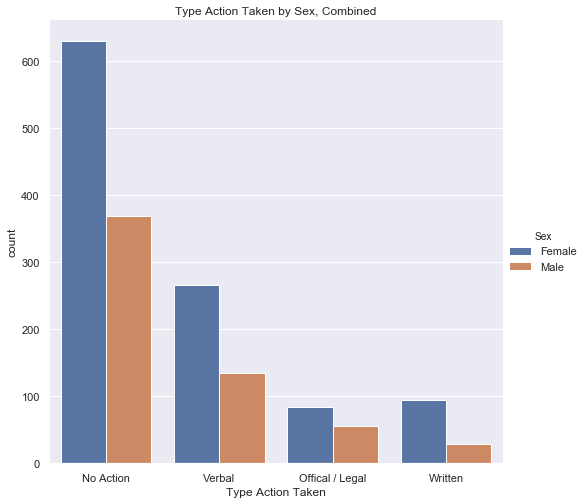

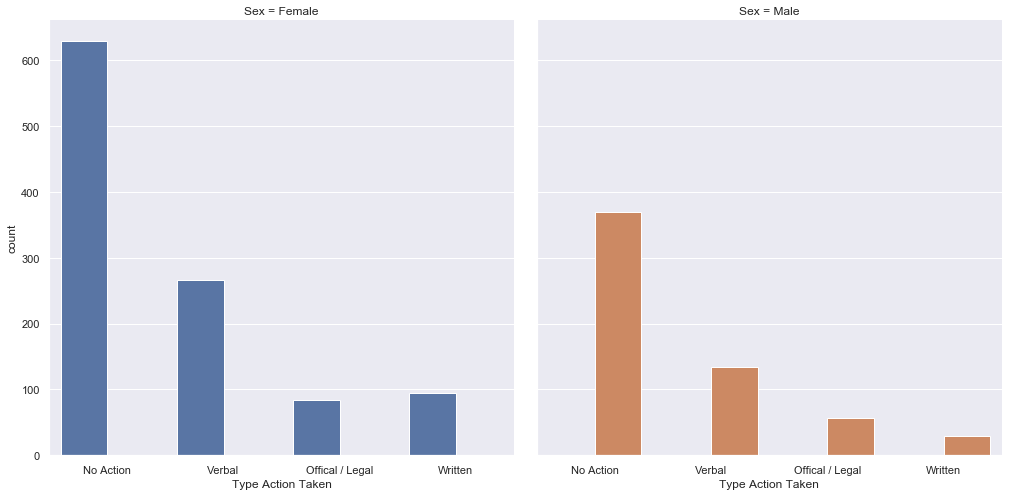

In [15]:
v = sns.catplot(x="Type Action Taken", hue="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);
v.set(title="Type Action Taken by Sex, Combined")
g = sns.catplot(x="Type Action Taken", hue="Sex", col="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);

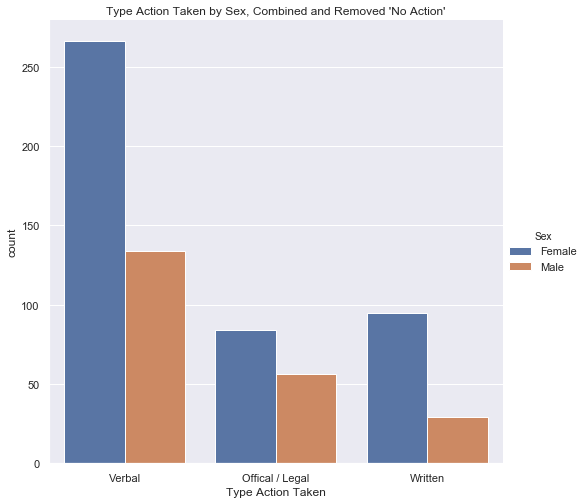

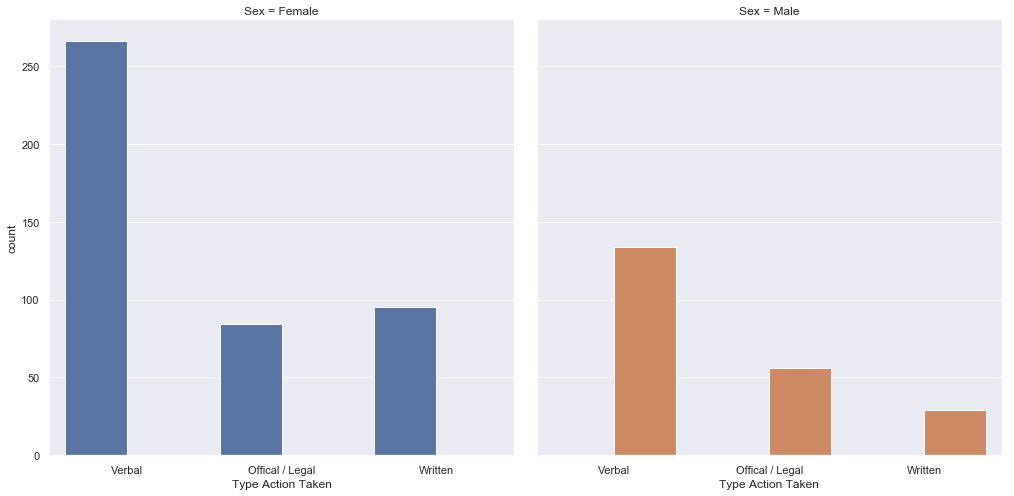

In [16]:
df_act_yes =  df['Action Taken']=='Yes'
df_yes_act = df[df_act_yes]

v = sns.catplot(x="Type Action Taken", hue="Sex",
                data=df_yes_act, kind="count",
                height=7, aspect=1);
v.set(title="Type Action Taken by Sex, Combined and Removed 'No Action'")
g = sns.catplot(x="Type Action Taken", hue="Sex", col="Sex",
                data=df_yes_act, kind="count",
                height=7, aspect=1);

In [20]:
print(df.yes.groupby('Sex').describe())

       Action Taken                 Discriminated Against                    \
              count unique top freq                 count unique  top  freq   
Sex                                                                           
Female         1074      2  No  629                  1074      1  Yes  1074   
Male            588      2  No  369                   588      1  Yes   588   

       Social Setting                                Type                     \
                count unique               top freq count unique    top freq   
Sex                                                                            
Female           1074      9         Workplace  263  1074      7  Other  325   
Male              588      9  Looking for Work  150   588      7  Other  201   

       Type Action Taken                         
                   count unique        top freq  
Sex                                              
Female              1074      4  No Action  629  
Mal